In [1]:
!pip install fastai2 -q

     |████████████████████████████████| 184kB 24.5MB/s 


In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

In [0]:
np.random.seed(42)

In [112]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [113]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [114]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_109.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_83.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_203.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_13.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_15.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_172.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_55.jpg')...]

In [115]:
fnames = get_image_files(path/"images")
fnames[:10]

(#10) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_109.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_83.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_203.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_13.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_15.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_172.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_55.jpg')]

In [0]:
pat = r"(.+)_\d+.jpg$"

In [0]:
batch_tfms = [*aug_transforms(size=224, max_warp=0.25), Normalize.from_stats(*imagenet_stats)]

In [0]:
item_tfms = RandomResizedCrop(448, min_scale=0.75, ratio=(1., 1.))

In [0]:
bs = 64

In [0]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, bs=bs, 
                                     batch_tfms=batch_tfms, item_tfms=item_tfms)

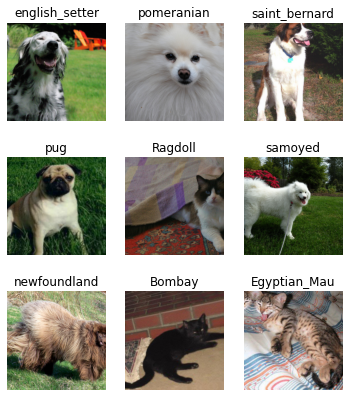

In [121]:
dls.show_batch(max_n=9, figsize=(6, 7))

In [0]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(), 
                 get_y=RegexLabeller(pat=r"/([^/]+)_\d+.*"), 
                 item_tfms=item_tfms, 
                 batch_tfms=batch_tfms)

In [0]:
path_im = path/"images"

In [0]:
dls = pets.dataloaders(path_im, bs=bs)

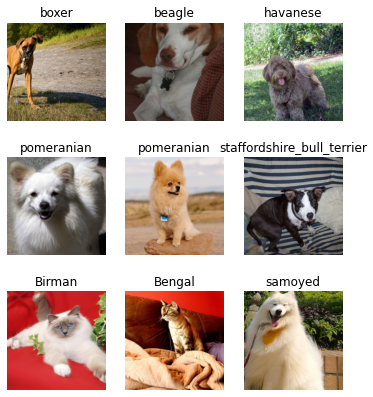

In [125]:
dls.show_batch(max_n=9, figsize=(6, 7))

In [126]:
dls.vocab

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]

In [127]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [0]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

In [129]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.419452,0.456540,0.148173,01:08
1,0.801267,0.281705,0.091340,01:08
2,0.443443,0.249531,0.080514,01:08
3,0.314919,0.235760,0.071042,01:08
4,0.265099,0.218174,0.067659,01:08
5,0.229386,0.218443,0.066306,01:07


In [0]:
learn.save("01i-stage1")

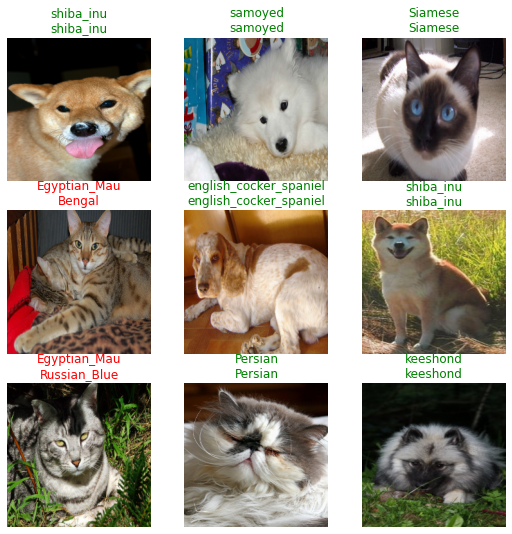

In [131]:
learn.show_results()

In [132]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

len(dls.valid_ds) == len(losses) == len(idxs)

True

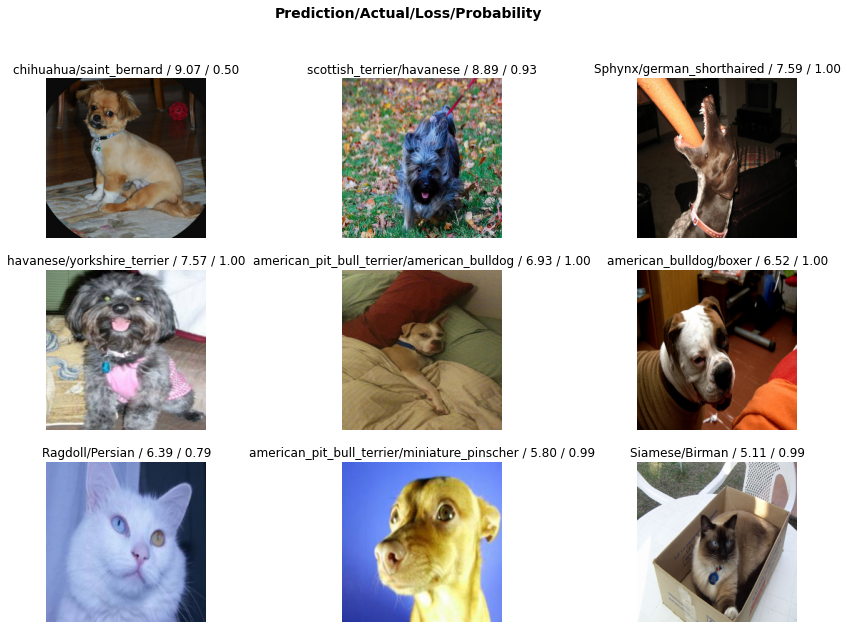

In [133]:
interp.plot_top_losses(9, figsize=(15, 10))

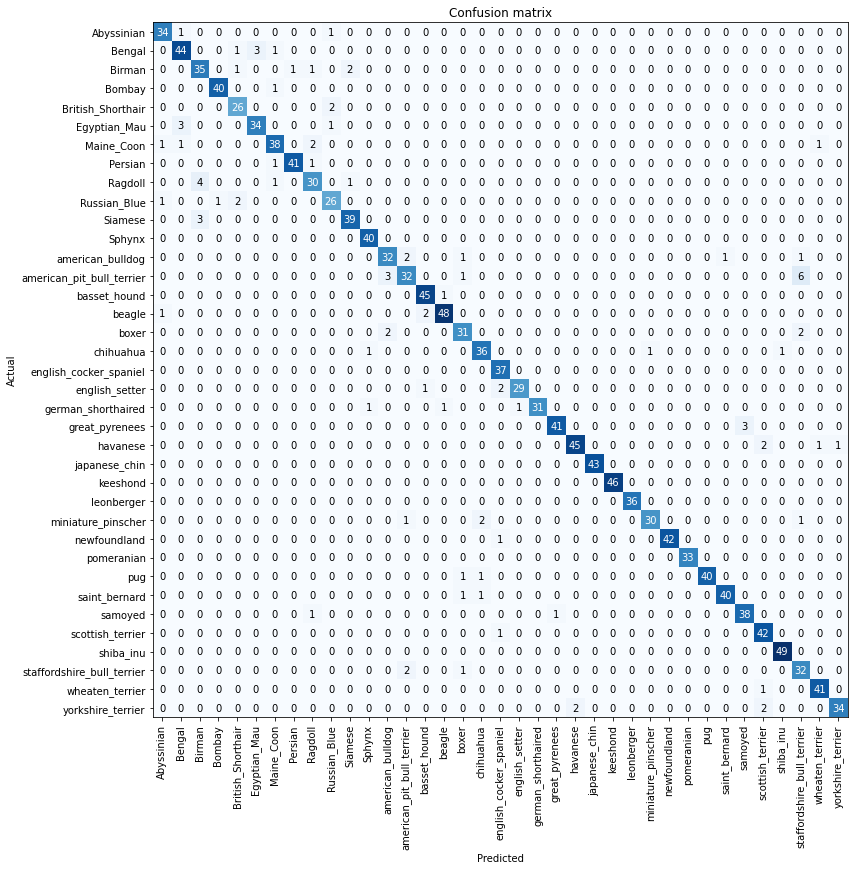

In [134]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=72)

In [135]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Ragdoll', 'Birman', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('great_pyrenees', 'samoyed', 3)]

In [136]:
learn.load("01i-stage1")

In [0]:
learn.unfreeze()

In [138]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.362320,1.721701,0.442490,01:09
1,0.719638,0.491745,0.157645,01:10


In [147]:
learn.load("01i-stage1")

In [0]:
learn.unfreeze()

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=6.309573450380412e-07)

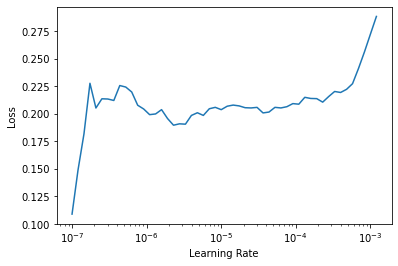

In [141]:
learn.lr_find()

In [149]:
learn.fit_one_cycle(3, lr_max=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.219592,0.217407,0.068336,01:11
1,0.216618,0.213142,0.066982,01:11
2,0.202165,0.215252,0.066306,01:10


In [0]:
learn.save('01i-stage2')